# 일반화 성능

In [31]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(1500, random_state = 2000)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3033,3034,1,62465,178,0,213146,263,28,10,very_unsat,little,actively_looking_into_it,1
6093,6094,0,35602,0,7,931614,154,1,6,avg,little,considering,0
18414,18415,1,81147,242,77,894730,289,25,5,very_sat,very_little,considering,0
5553,5554,1,75295,0,0,942279,397,0,10,unsat,little,actively_looking_into_it,0
2826,2827,0,59710,200,64,248570,318,4,1,very_unsat,high,considering,1


In [4]:
# 데이터 정리
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3033,1,62465,178,0,213146,263,28,10,very_unsat,little,actively_looking_into_it,1
6093,0,35602,0,7,931614,154,1,6,avg,little,considering,0
18414,1,81147,242,77,894730,289,25,5,very_sat,very_little,considering,0
5553,1,75295,0,0,942279,397,0,10,unsat,little,actively_looking_into_it,0
2826,0,59710,200,64,248570,318,4,1,very_unsat,high,considering,1


In [5]:
# 데이터 분할
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [7]:
# 결측치 확인
print(x.isna().sum())
print(y.isna().sum())

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
dtype: int64
0


In [8]:
# 가변수화
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

In [16]:
# 정분류율이 계속 달라짐
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 2)

model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train, y_train)
pred = model.predict(x_val)

accuracy_score(y_val, pred)

1.0

- k - fold cross validation

In [18]:
model = DecisionTreeClassifier(max_depth = 5)
dt_result = cross_val_score(model, x, y, cv = 5)
print(dt_result)
print(dt_result.mean(), dt_result.std())

[0.64333333 0.66       0.62       0.66666667 0.64666667]
0.6473333333333333 0.01611072796479276


- learning_curve

In [22]:
tr_size, tr_scores, val_scores = learning_curve(model, x, y, train_sizes = range(5, 1300, 10), cv = 10)

In [23]:
val_scores_mean = val_scores.mean(axis = 1)
val_scores_std = val_scores.std(axis = 1)

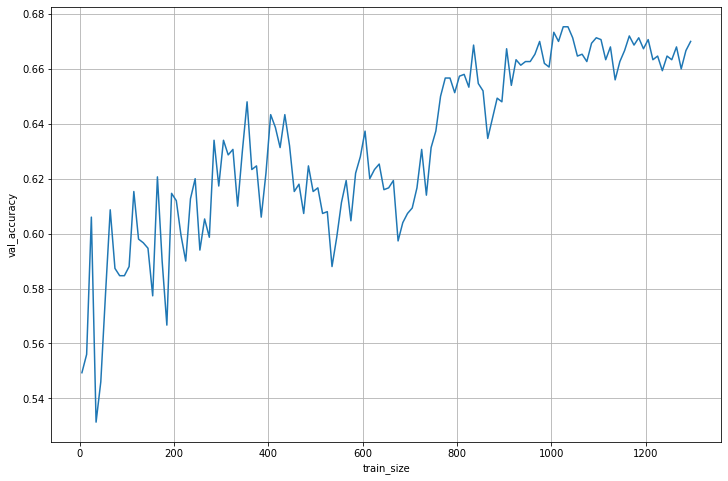

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(tr_size, val_scores_mean)

plt.ylabel('val_accuracy')
plt.xlabel('train_size')
plt.grid()
plt.show()

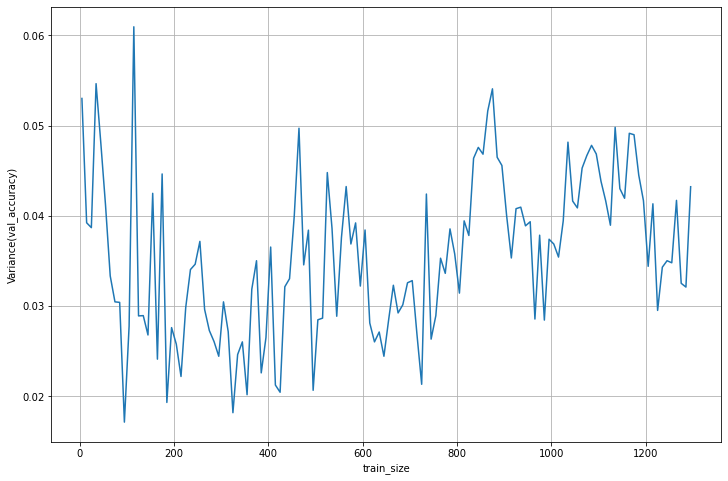

In [26]:
plt.figure(figsize = (12, 8))
plt.plot(tr_size, val_scores_std)

plt.ylabel('Variance(val_accuracy)')
plt.xlabel('train_size')
plt.grid()
plt.show()

- Fitting Graph

In [27]:
result_train = [] 
result_val = [] 
depth = list(range(1, 31))

for d in depth :
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(x_train, y_train)
    pred_tr, pred_val = model.predict(x_train), model.predict(x_val)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))

In [29]:
pd.DataFrame({'max_depth': list(range(1, 31)),'train_acc':result_train, 'val_acc':result_val})

,max_depth,train_acc,val_acc
0,1,0.618158,1.0
1,2,0.662216,0.5
2,3,0.698932,1.0
3,4,0.716288,1.0
4,5,0.733645,1.0
5,6,0.769693,0.5
6,7,0.807076,0.5
7,8,0.848465,0.5
8,9,0.875167,0.5
9,10,0.907877,0.5


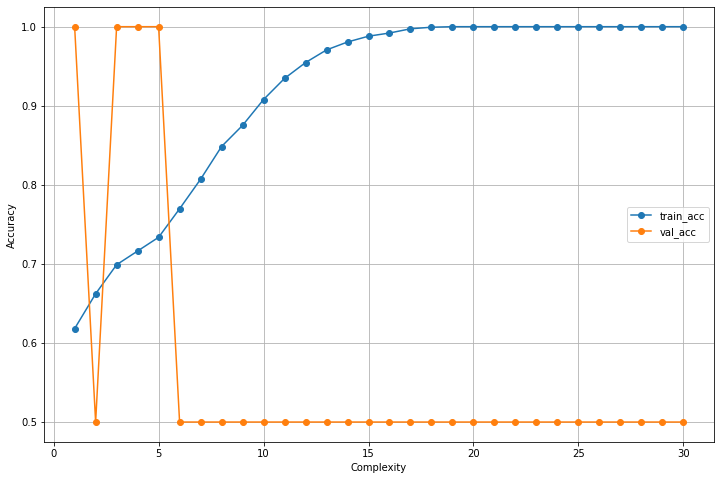

In [30]:
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Random Forest

In [32]:
params = {
    'n_estimators' : range(100, 501, 50),
    'max_features' : range(1, 12)
}

model = RandomForestClassifier()

model_gs = GridSearchCV(model,
                       params,
                       cv = 5)

model_gs.fit(x_train, y_train)

pred = model_gs.predict(x_val)
print(model_gs.cv_results_)
print(model_gs.best_params_, model_gs.best_score_)
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

{'mean_fit_time': array([0.20046496, 0.27329712, 0.37195339, 0.50903907, 0.57817745,
       0.68263025, 0.73991852, 0.8262681 , 0.95497532, 0.2030468 ,
       0.31340795, 0.4014214 , 0.48000712, 0.59965577, 0.67937298,
       0.79304399, 0.96283274, 1.08546553, 0.24800043, 0.32196512,
       0.40461764, 0.56909971, 0.66042309, 0.90409389, 0.95668316,
       0.98990984, 1.60992193, 0.37126069, 0.47876682, 0.54204621,
       0.70202622, 0.79096189, 0.94664497, 0.99052806, 1.09708838,
       1.18210154, 0.28008847, 0.39211354, 0.55806246, 0.7588563 ,
       0.77166991, 0.91142135, 0.96747856, 1.1212049 , 1.24424634,
       0.28765306, 0.38473411, 0.56629715, 0.65846753, 0.79625206,
       0.90911975, 1.03613424, 1.15154624, 1.27535915, 0.28939948,
       0.42452278, 0.57983093, 0.6875927 , 0.83688073, 0.96907053,
       1.1337873 , 1.24968352, 1.3608572 , 0.28659215, 0.45065365,
       0.57312069, 0.74038334, 0.8777895 , 1.04493847, 1.29074717,
       1.39551759, 1.47427473, 0.33151283, 0

In [34]:
result = pd.DataFrame(model_gs.cv_results_)
temp = result.loc[:, ['param_n_estimators', 'mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,100,0.637518
1,150,0.626847
2,200,0.632183
3,250,0.642198
4,300,0.631538


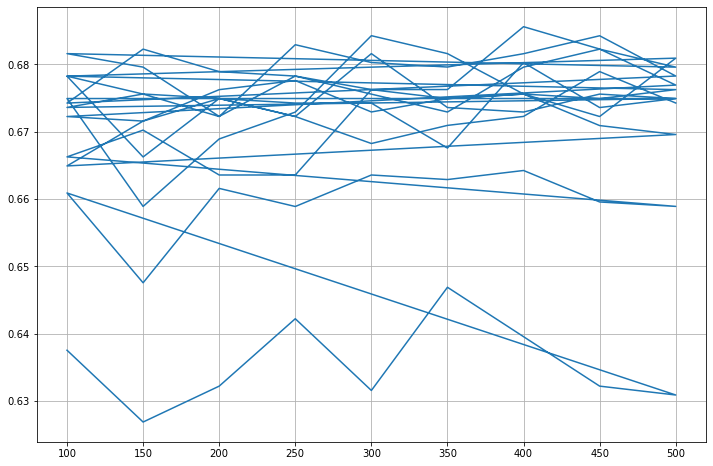

In [35]:
plt.figure(figsize = (12,8))
plt.plot('param_n_estimators', 'mean_test_score', data = temp)
plt.grid()
plt.show()